# **MEDICAL COST ANALYSIS**

##  Importing the data and libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data1 = data.copy()

In [4]:
data.head() 
#bmi = body mass index 
#charges = medical costs

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Short description of the columns

#### Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

## NaN values, shape and description of the data

In [5]:
data.shape

(1338, 7)

In [6]:
data.info() #all values are non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe() #bmi max could be outlier

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## EDA

* BMI

In [8]:
data.bmi.value_counts()

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64

In [9]:
data.bmi.mean()

30.663396860986538

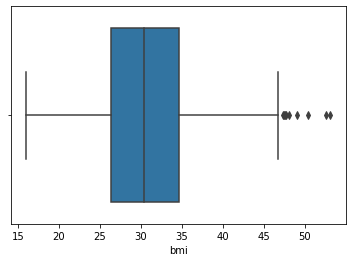

In [10]:
sns.boxplot(x = "bmi", data=data); #outliers

<AxesSubplot:ylabel='Frequency'>

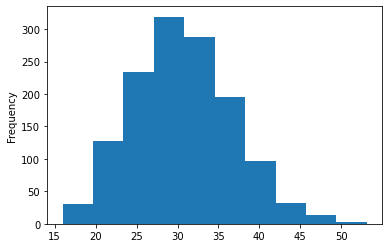

In [11]:
data.bmi.plot(kind="hist")

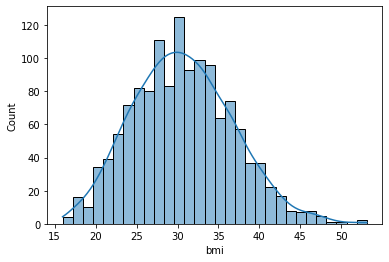

In [12]:
sns.histplot(data=data, x= "bmi", bins=30, kde=True);

In [13]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

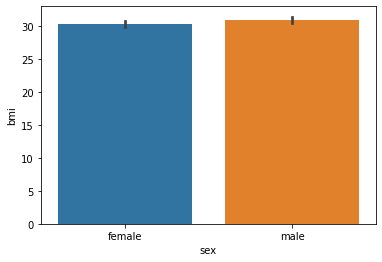

In [14]:
sns.barplot(data=data, x="sex", y="bmi");

In [15]:
data[data["sex"] == "female"]["bmi"].mean()

30.377749244713023

In [16]:
data[data["sex"] == "male"]["bmi"].mean()

30.943128698224832

* SMOKER & CHARGES

In [17]:
data.smoker.value_counts() #most people are not smokers

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
data.charges.value_counts()

1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100    1
              ..
62592.87309    1
18903.49141    1
8538.28845     1
11165.41765    1
60021.39897    1
Name: charges, Length: 1337, dtype: int64

In [19]:
data.charges.mean()

13270.422265141257

In [20]:
data[data["smoker"] == "yes"]["charges"].mean()

32050.23183153285

In [21]:
data[data["smoker"] == "no"]["charges"].mean()

8434.268297856199

When we look at the last two mean calculations, the people that are smokers have higher cost than non-smokers people for health insurance

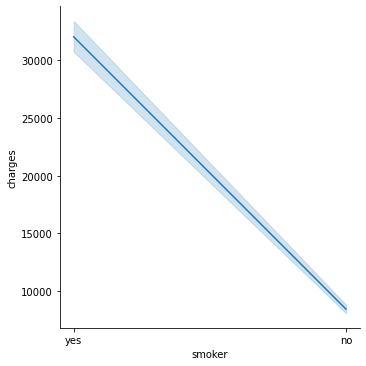

In [22]:
sns.relplot(x="smoker", y="charges", kind="line", data=data);

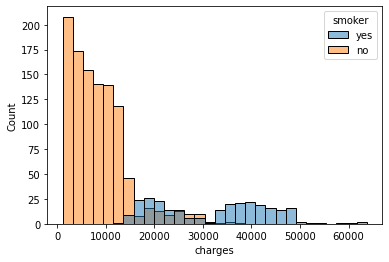

In [23]:
sns.histplot(data=data, x="charges", hue="smoker");

In [24]:
data[data["smoker"] == "yes"].charges.sum().round()

8781764.0

In [25]:
data[data["smoker"] == "no"].charges.sum().round()

8974061.0

* SMOKER & REGION

In [26]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [27]:
data[["region", "smoker"]].value_counts()

region     smoker
southeast  no        273
northwest  no        267
southwest  no        267
northeast  no        257
southeast  yes        91
northeast  yes        67
northwest  yes        58
southwest  yes        58
dtype: int64

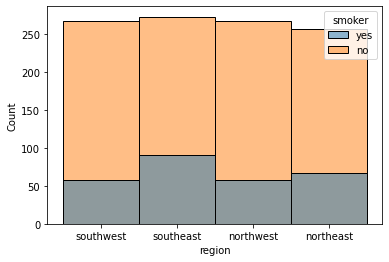

In [28]:
sns.histplot(data=data, x="region", hue="smoker");

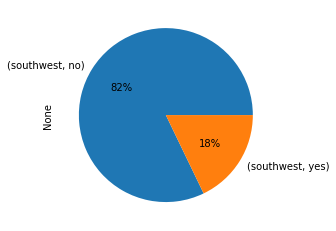

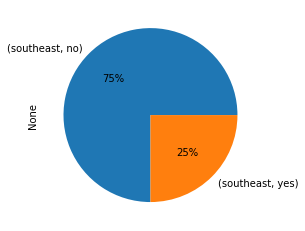

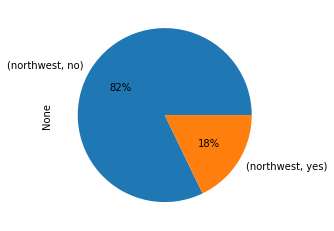

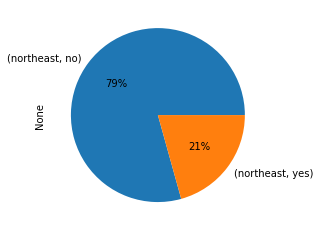

In [29]:
region_list = ['southwest', 'southeast', 'northwest', 'northeast']
for i in region_list:
    data[data["region"] == i][["region","smoker"]].value_counts().plot(kind="pie",autopct='%1.0f%%')
    plt.show()

In [30]:
#The southeast region has the highest percentage of smokers, 
#northwest and southwest are the regions that have the lowest percentages of smokers

* CHILDREN & REGION

In [31]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [32]:
data[["children","region"]].value_counts()

children  region   
0         southeast    157
          northeast    147
          southwest    138
          northwest    132
1         southeast     95
          southwest     78
          northeast     77
          northwest     74
2         northwest     66
          southeast     66
          southwest     57
          northeast     51
3         northwest     46
          northeast     39
          southwest     37
          southeast     35
5         southwest      8
4         northeast      7
          southwest      7
          northwest      6
5         southeast      6
4         southeast      5
5         northeast      3
          northwest      1
dtype: int64

Which region has the highest sum of children?

In [33]:
data[["region","children"]].groupby("region").sum("children")

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


In [34]:
data[["region","children"]].groupby("region").sum("children").sort_values(by="children", ascending=False).head(1)

,children
region,
southeast,382


* AGE & BMI

In [35]:
data.age.value_counts().sort_index()

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

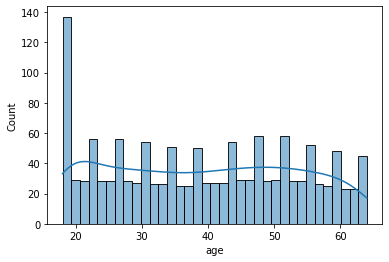

In [36]:
sns.histplot(data=data, x="age", kde=True, bins=35); 

In [37]:
data.age.mean() # value counts by age are close except 18 and 19 age values

39.20702541106129

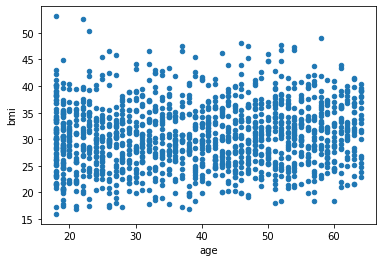

In [38]:
data.plot(kind="scatter", x="age", y="bmi");

 The number of people that are 18 and 19 is more than other age values' count. When we look at the bmi column by age, generally bmi values are in same range.

* CHILDREN & BMI

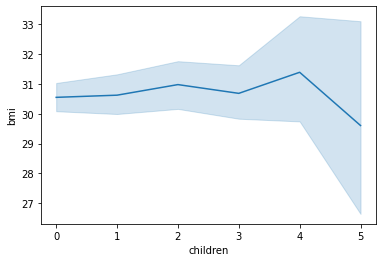

In [39]:
sns.lineplot(data=data, x="children", y="bmi");

In [40]:
data[["children", "bmi"]].groupby("children").mean()

,bmi
children,
0,30.550296
1,30.623148
2,30.978104
3,30.684331
4,31.391200
5,29.605000


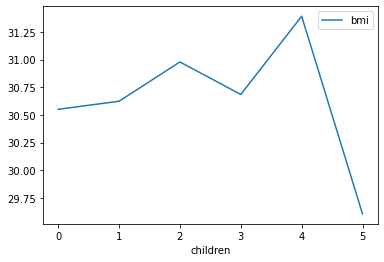

In [41]:
data[["children", "bmi"]].groupby("children").mean().plot(kind="line");

* CHARGES & BMI

In [42]:
data[data["bmi"]<30]["charges"].value_counts().sum() #below bmi mean (30)

631

In [43]:
data[data["bmi"]>30]["charges"].value_counts().sum() #below bmi mean (30)

705

In [44]:
data[data["bmi"]<30]["charges"].mean() #below bmi mean (30)

10713.66690058478

In [45]:
data[data["bmi"]>30]["charges"].mean() #above bmi mean (30)

15560.92632126241

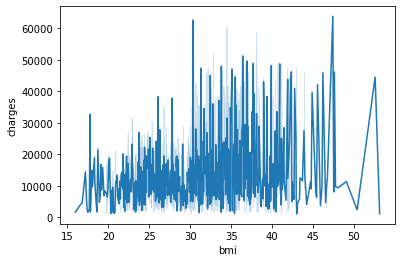

In [46]:
sns.lineplot(data=data, x="bmi", y="charges");

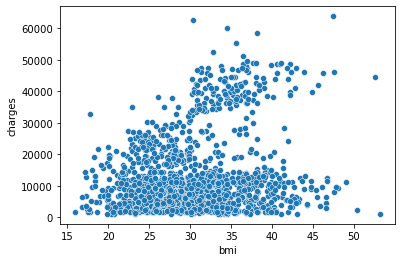

In [47]:
sns.scatterplot(data=data, x="bmi", y="charges");

Individuals with bmi values that are higher than average pay more charges.

* REGION & SMOKER & BMI

In [48]:
data[["region", "smoker", "bmi"]]

,region,smoker,bmi
0,southwest,yes,27.900
1,southeast,no,33.770
2,southeast,no,33.000
3,northwest,no,22.705
4,northwest,no,28.880
...,...,...,...
1333,northwest,no,30.970
1334,northeast,no,31.920
1335,southeast,no,36.850
1336,southwest,no,25.800


In [49]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

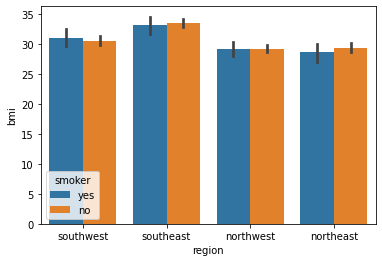

In [50]:
sns.barplot(data=data[["region", "smoker", "bmi"]], x = "region", y="bmi", hue="smoker");

Bmi values are close for both groups (smokers and non-smokers). Individuals' that are in Southeast bmi values higher than 
others'

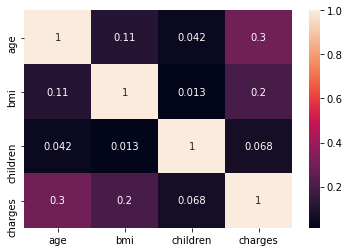

In [51]:
sns.heatmap(data.corr(), annot = True);

## Data Preprocessing

In [52]:
data = pd.get_dummies(data, columns= ["region", "smoker", "sex"], drop_first=True)

In [53]:
data

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,smoker_yes,sex_male
0,19,27.900,0,16884.92400,0,0,1,1,0
1,18,33.770,1,1725.55230,0,1,0,0,1
2,28,33.000,3,4449.46200,0,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,1,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

In [55]:
X = data.drop(["charges"], axis=1)
y = data.charges

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linear_model = LinearRegression()

In [60]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = linear_model.predict(X_test)

#### Error metrics

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [65]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7835929767120723
MAE 		: 4181.194473753651
MSE 		: 33596915.85136147
RMSE 		: 5796.2846592762735


In [67]:
y_train_pred = linear_model.predict(X_train)
r2_score(y_train, y_train_pred)

0.7417255854683333

In [68]:
from sklearn.model_selection import cross_val_score, cross_validate

In [69]:
scores = cross_validate(linear_model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                             7.331101e-01
test_neg_mean_absolute_error       -4.245228e+03
test_neg_mean_squared_error        -3.794789e+07
test_neg_root_mean_squared_error   -6.147094e+03
dtype: float64
----------------------------------------------------------------


,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.001255,0.007998,0.715855,-4349.374629,-4.013183e+07,-6334.969054
1,0.000000,0.008001,0.802106,-4225.950334,-3.207703e+07,-5663.659111
2,0.000000,0.000000,0.722961,-4118.374231,-3.591019e+07,-5992.511012
3,0.007999,0.000000,0.657843,-4634.488691,-4.659042e+07,-6825.717407
4,0.009684,0.000000,0.766786,-3897.951854,-3.502998e+07,-5918.613136


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

#### Error metrics

In [73]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8652615277058406
MAE 		: 2545.3173816665467
MSE 		: 20917976.906807717
RMSE 		: 4573.617485842877


In [74]:
r2_score(y_train, y_train_pred)

0.9741506599052375

In [75]:
scores = cross_validate(rf_model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error',
                                                                 'neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores

test_r2                             8.246670e-01
test_neg_mean_absolute_error       -2.777365e+03
test_neg_mean_squared_error        -2.478956e+07
test_neg_root_mean_squared_error   -4.955458e+03
dtype: float64
----------------------------------------------------------------


,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.392134,0.016004,0.817198,-2665.998940,-2.581841e+07,-5081.182341
1,0.374382,0.017969,0.899650,-2477.387164,-1.626592e+07,-4033.103556
2,0.506937,0.008004,0.795097,-2856.019348,-2.655985e+07,-5153.625402
3,0.374699,0.042479,0.781486,-2954.432219,-2.975444e+07,-5454.762669
4,0.501729,0.031954,0.829905,-2932.989729,-2.554915e+07,-5054.617142


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {"n_estimators":[100,300,500],
             "max_depth":[3,5,7],
             "max_features":[3,5],
             "min_samples_split":[2,4,6]}

In [80]:
rf_model = RandomForestRegressor(random_state=101)
rf_grid_model = GridSearchCV(estimator=rf_model,
                            param_grid=param_grid,
                            scoring='neg_root_mean_squared_error',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [81]:
rf_grid_model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [82]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [83]:
rf_r2

0.8776192727922255

In [84]:
r2_score(y_train, y_train_pred)

0.8823680178034913

In [85]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8776192727922255
MAE 		: 2522.9191572971035
MSE 		: 18999452.65804776
RMSE 		: 4358.836158660676


### SVM

In [86]:
from sklearn.svm import SVR, LinearSVR

In [87]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [88]:
y_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)

#### Error metrics

In [89]:
svr_r2 = r2_score(y_test, y_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [90]:
svr_r2

-0.07008155372454805

In [91]:
svr_rmse

12889.096314656128

In [92]:
param_grid = {'C':[100,1000,10000],
             'kernel':['linear','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3],
              'epsilon':[1,2,5,10]}

In [93]:
svr_model = SVR()
svr_grid_model = GridSearchCV(estimator=svr_model,
                              param_grid=param_grid,
                              scoring='neg_root_mean_squared_error',
                              n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [94]:
svr_grid_model.best_params_

{'C': 10000, 'degree': 3, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'poly'}

In [95]:
y_pred = svr_grid_model.predict(X_test)
y_train_pred = svr_grid_model.predict(X_train)
svr_grid_r2 = r2_score(y_test, y_pred)
svr_grid_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [96]:
svr_grid_r2

0.8582517368443465

In [97]:
svr_grid_rmse

4691.080690638064

In [98]:
r2_score(y_train, y_train_pred)

0.8231314276188447

In [99]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8582517368443465
MAE 		: 1925.8248438071928
MSE 		: 22006238.046077292
RMSE 		: 4691.080690638064


## Model Selection

*SUMMARY*
- When we train the data with Linear, RF and SVM Models first, we received the best scores with using SVM and RF but RF may be overfitting
- We applied gridsearchcv for SVM and RF
- After gridsearchcv;
  
  
  We can use RF or SVM Model when we look at the final R2 and RMSE scores